## Explore SEED-Bench dataset

In [10]:
import os
import json
import argparse

from tqdm import tqdm
import numpy as np
import random
import pandas as pd

import cv2
import matplotlib.pyplot as plt

%matplotlib inline

### Part I. Explore questions

In [3]:
dataset_path = './dataset/'
questions_path = os.path.join(dataset_path, 'annotations/SEED-Bench.json')
qa_anno = json.load(open(questions_path, 'rb'))
pd.DataFrame(qa_anno['questions']).head(5)

,answer,choice_a,choice_b,choice_c,choice_d,data_id,data_type,question,question_id,question_type_id,segment
0,A,One,Two,Three,Four,1454426_2591111986,image,How many towels are in the image?,101669,5,NaN
1,C,A hotel,A house,A cabin,A shed,1307737_3736205576,image,What type of building is in the image?,104933,3,NaN
2,C,Standing with his arms crossed,Holding a cell phone,Taking a picture,Talking to someone,2809357_337019870,image,What is the man in the suit doing in the image?,89257,1,NaN
3,A,White,Black,Gray,Brown,124217_564854171,image,What is the color of the chair seen on the rig...,75209,3,NaN
4,D,One,Two,Three,Four,175998_3410025962,image,How many people are present in the image?,34143,5,NaN


In [15]:
task_id_map = qa_anno['question_type']
# Reverse the mapping
task_id_map_reverse = {v: k for k, v in task_id_map.items()}
task_id_map

{'Scene Understanding': 1,
 'Instance Identity': 2,
 'Instance Attributes': 3,
 'Instance Location': 4,
 'Instances Counting': 5,
 'Spatial Relation': 6,
 'Instance Interaction': 7,
 'Visual Reasoning': 8,
 'Text Understanding': 9,
 'Action Recognition': 10,
 'Action Prediction': 11,
 'Procedure Understanding': 12}

{'Instances Counting': 2447, 'Instance Attributes': 4649, 'Scene Understanding': 3158, 'Instance Identity': 1831, 'Instance Interaction': 97, 'Visual Reasoning': 331, 'Instance Location': 978, 'Spatial Relation': 657, 'Text Understanding': 85, 'Action Recognition': 1509, 'Action Prediction': 1225, 'Procedure Understanding': 1023}


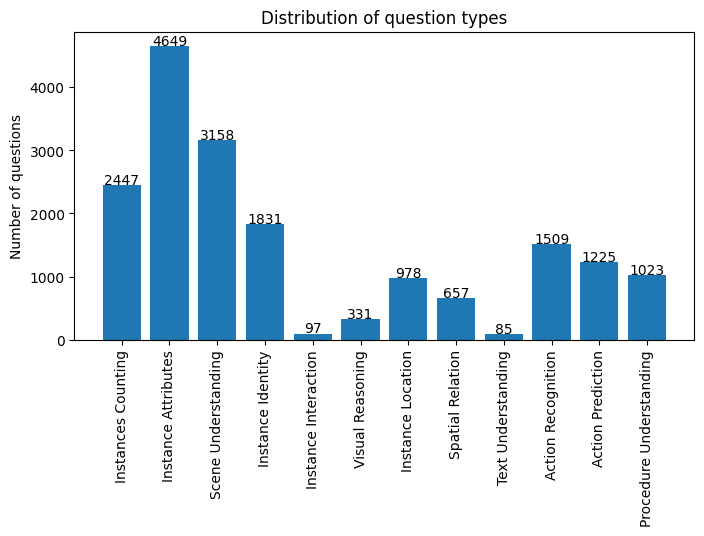

In [24]:
# Distribution of question types
question_type_counts = {}
for q in qa_anno['questions']:
    question_type = q['question_type_id']
    if question_type in question_type_counts:
        question_type_counts[question_type] += 1
    else:
        question_type_counts[question_type] = 1

# Map the key to the task name
question_type_counts = {task_id_map_reverse[k]: v for k, v in question_type_counts.items()}
print(question_type_counts)

# Plot a histogram of the question type count
plt.figure(figsize=(8, 4))
plt.bar(question_type_counts.keys(), question_type_counts.values())
plt.xticks(rotation=90)
plt.ylabel('Number of questions')
plt.title('Distribution of question types')
# Plot the count on top of the bar
for i, v in enumerate(question_type_counts.values()):
    plt.text(i, v + 15, str(v), ha='center')
plt.show()

In [5]:
# What kind of questions are there for each task?
# Sample 3 questions from each task, and print them out.
random.seed(40)
for task_name, task_id in task_id_map.items():
    print(f'Task: {task_name}')
    task_questions = [q for q in qa_anno['questions'] if q['question_type_id'] == task_id]
    for q in random.sample(task_questions, 3):
        print(f'{q["question"]} Choice: {q["choice_a"]}/{q["choice_b"]}/{q["choice_c"]}/{q["choice_d"]} {q["data_id"]}')
    print()

Task: Scene Understanding
What is the dominant color in the living room? Choice: Beige/White/Gray/Brown 491751_2851766447
What is the primary object in the image? Choice: Piano/Drum set/Guitar/Microphone 477853_3366417264
What is the overall landscape of the image? Choice: Desert/Meadow/City/Mountain 18386_1704503727

Task: Instance Identity
What type of vehicle is the police officer standing near? Choice: A motorcycle/A black SUV/A police car/A public bus 1520248_1222671868
What is the woman wearing on her feet? Choice: White sneakers/Red boots/Orange sandals/Black shoes 493133_2292642519
Which object in the image is made of metal and is decorative? Choice: The man's watch/The woman's necklace/The metal decoration on the ground/The metal doorknob 302970_782031453

Task: Instance Attributes
What is the shape of the table in the image? Choice: Round/Square/Oval/Rectangular 458842_1165148336
What is the woman with the necklace wearing? Choice: A white shirt and black pants/A black dress/

(np.float64(-0.5), np.float64(511.5), np.float64(288.5), np.float64(-0.5))

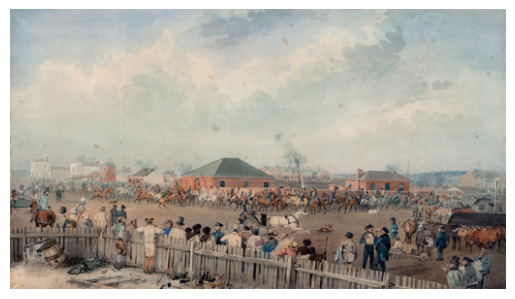

In [41]:
from PIL import Image
# Scene Understanding task
# The question is:
# Based on the image, what could be an appropriate title for this scene? Choice: "A Peaceful Countryside Gathering"/"A Bustling City Square"/"A Day at the Beach"/"A Mountain Adventure"

example_data_id = "1949080_3893461062"
data_path = os.path.join(dataset_path, 'SEED-Bench-image', example_data_id)
raw_image = Image.open(open(data_path, "rb")).convert("RGB")

# resize the image to make it smaller
# print the image
raw_image.thumbnail((512, 512))
plt.imshow(raw_image)
plt.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

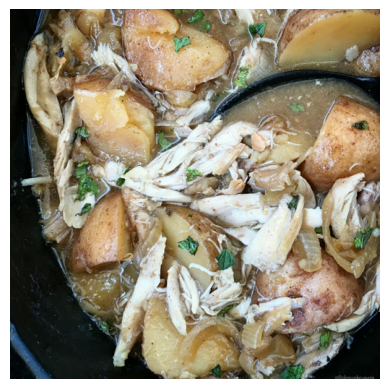

In [42]:
# Instance interaction task
# What is the relation between the chicken and the potatoes in the image? Choice: They are cooked together in a pot/They are arranged side by side on a plate/The chicken is on top of the potatoes in a skillet/They are not related 1593552_984678467

example_data_id_2 = "1593552_984678467"
data_path = os.path.join(dataset_path, 'SEED-Bench-image', example_data_id_2)
raw_image_2 = Image.open(open(data_path, "rb")).convert("RGB")
raw_image_2.thumbnail((512, 512))
plt.imshow(raw_image_2)
plt.axis('off')

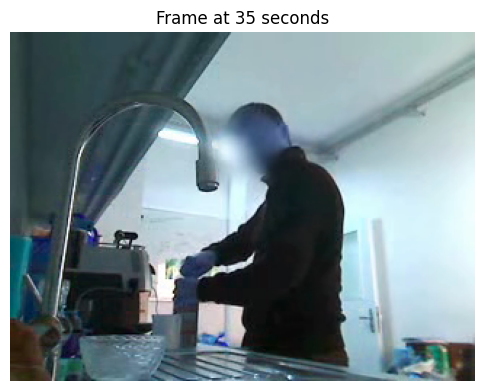

Frame at 35 seconds displayed


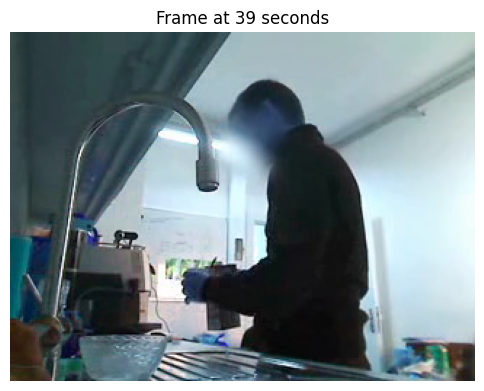

Frame at 39 seconds displayed


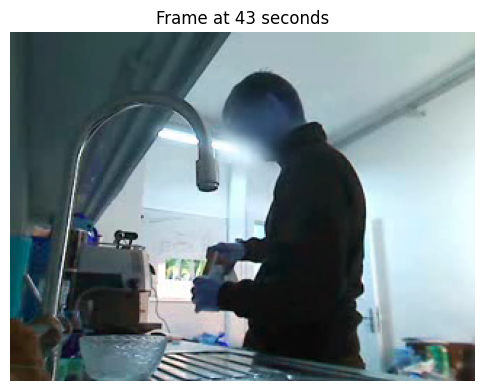

Frame at 43 seconds displayed


In [12]:
# Visualize video for Procedure Recognition task
# Could you predict the series of actions in this video and enumerate them in order. Choice: lift open bottle, pour milk, close bottle/pick up jug, pour milk, carry jug/transfer liquid to glass, pour milk, transfer liquid to bowl/carry milk, pour milk, carry milk P46/webcam01/P46_milk.avi

example_video_id = "P46/webcam01/P46_milk.avi"
video_path = os.path.join(dataset_path, 'BreakfastII_15fps_qvga_sync', example_video_id)


def extract_frame_at_second(video_path, second):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    # Get the frames per second (fps) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    # Calculate the frame number for the given second
    frame_number = int(second * fps)
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    # Read the frame
    ret, frame = cap.read()
    # Release the video capture object
    cap.release()
    
    if ret:
        return frame
    else:
        return None

def display_frame(frame, second):
    plt.figure(figsize=(6, 5))
    plt.imshow(frame)
    plt.title(f"Frame at {second} seconds")
    plt.axis('off')
    plt.show()

seconds_to_extract = [35, 39, 43]  # List of seconds at which to extract frames
    
for second in seconds_to_extract:
    frame = extract_frame_at_second(video_path, second)
    if frame is not None:
        display_frame(frame, second)
        print(f"Frame at {second} seconds displayed")
    else:
        print(f"Failed to extract frame at {second} seconds")

### Part II. Evaluate model

In [27]:
# load GPT-4V answers
gpt_4v_result_path = './evaluate_result/'
gpt_4v_result = json.load(open(gpt_4v_result_path + 'SEED-Bench-1/GPT-4V.json', 'r'))

In [28]:
# The questions json map question id, question type 
qa_anno_df = pd.DataFrame(qa_anno['questions'])
print(qa_anno_df.shape)

# The gpt-4v result json map question id, answer
gpt_4v_result_df = pd.DataFrame(gpt_4v_result)

# Merge the two dataframes on question id
merged_df = qa_anno_df.merge(gpt_4v_result_df, on='question_id')
merged_df = merged_df.drop_duplicates(subset=['question_id'])
# Map question type id to question type
merged_df['question_type'] = merged_df['question_type_id'].map(task_id_map_reverse)
print(merged_df.shape)
merged_df.head(1)

(17990, 11)
(17989, 14)


,answer,choice_a,choice_b,choice_c,choice_d,data_id,data_type,question,question_id,question_type_id,segment,prediction,gt_answer,question_type
0,A,One,Two,Three,Four,1454426_2591111986,image,How many towels are in the image?,101669,5,NaN,A,A,Instances Counting


In [29]:
# The code logic is adapted from eval.py

type_counts = {}
correct_counts = {}

for row in merged_df.iterrows():
    pred, gt, data_type = row[1]['prediction'], row[1]['gt_answer'], row[1]['question_type']

    type_counts[data_type] = type_counts.get(data_type, 0) + 1
    if pred == gt:
        correct_counts[data_type] = correct_counts.get(data_type, 0) + 1

print("Accuracy for each data type:")
total_count = 0
total_correct = 0
for data_type in type_counts.keys():
    accuracy = correct_counts[data_type] / type_counts[data_type] * 100
    print(f"{data_type}: {accuracy:.2f}%")

    total_count += type_counts[data_type]
    total_correct += correct_counts[data_type]

total_accuracy = total_correct / total_count * 100
print(f"Total accuracy: {total_accuracy:.2f}%")

Accuracy for each data type:
Instances Counting: 56.85%
Instance Attributes: 70.60%
Scene Understanding: 77.45%
Instance Identity: 73.95%
Instance Interaction: 74.23%
Visual Reasoning: 78.55%
Instance Location: 61.86%
Spatial Relation: 56.93%
Text Understanding: 57.14%
Action Recognition: 65.67%
Action Prediction: 51.67%
Procedure Understanding: 63.44%
Total accuracy: 67.29%


### Part III. Error Predictions

In [36]:
# Action Prediction: 51.67%

# Find out questions where action prediction is wrong
wrong_action_df = merged_df[merged_df['question_type'] == 'Action Prediction']
wrong_action_df = wrong_action_df[wrong_action_df['prediction'] != wrong_action_df['gt_answer']]

# Randomly sample 5 questions where action prediction is wrong
random.seed(40)
for i, row in wrong_action_df.sample(3).iterrows():
    print(f"Question: {row['question']}")
    print(f"Choices: (A) {row['choice_a']} (B) {row['choice_b']} (C) {row['choice_c']} (D) {row['choice_d']}")
    print(f"Prediction: {row['prediction']}")    
    print(f"Ground truth: {row['gt_answer']}")
    print(f"Data ID: {row['data_id']}")
    print()

Question: What do you think will be the subsequent action after the completion of this video?
Choices: (A) shake cup (B) lift cup (C) stir cup (D) adjust cup
Prediction: B
Ground truth: A
Data ID: P22/P22_01.MP4

Question: What do you expect to occur immediately after this video ends?
Choices: (A) examine timepiece heat (B) test timepiece temp (C) check watch temperature (D) inspect time heat
Prediction: B
Ground truth: C
Data ID: P30/P30_08.MP4

Question: Please predict the action that will occur after the end of this video.
Choices: (A) clean bowl (B) brush pan (C) polish glass (D) wash container
Prediction: A
Ground truth: D
Data ID: P01/P01_15.MP4

